In [1]:
import tensorflow as tf

sess = tf.InteractiveSession()

a = tf.constant([[1, 2],
                 [3, 4]], tf.float32)

print(sess.run(a))
print(a.eval())

[[ 1.  2.]
 [ 3.  4.]]
[[ 1.  2.]
 [ 3.  4.]]


In [2]:
X = tf.constant([[73, 80, 75],
                 [93, 88, 93],
                 [89, 91, 90],
                 [96, 98, 100],
                 [73, 66, 70]], tf.float32)

W = tf.constant([[.0],
                 [.0],
                 [1.]], tf.float32)

XW = tf.matmul(X, W)

print(XW.eval()) # print(sess.run(XW))

[[  75.]
 [  93.]
 [  90.]
 [ 100.]
 [  70.]]


In [3]:
print('X:', X)
print('W:', W)
print('XW:', XW)

X: Tensor("Const_1:0", shape=(5, 3), dtype=float32)
W: Tensor("Const_2:0", shape=(3, 1), dtype=float32)
XW: Tensor("MatMul:0", shape=(5, 1), dtype=float32)


In [4]:
XW = tf.constant([[75],
                  [93],
                  [90],
                  [100],
                  [70]], tf.float32)

b = tf.constant([10], tf.float32)

H = XW + b

print(H.eval()) # print(sess.run(H))

[[  85.]
 [ 103.]
 [ 100.]
 [ 110.]
 [  80.]]


In [5]:
X = tf.constant([[73, 80, 75],
                 [93, 88, 93],
                 [89, 91, 90],
                 [96, 98, 100],
                 [73, 66, 70]], tf.float32)

W = tf.constant([[.0],
                 [.0],
                 [1.]], tf.float32)

b = tf.constant([10], tf.float32)

H = tf.matmul(X, W) + b

print(H.eval())

[[  85.]
 [ 103.]
 [ 100.]
 [ 110.]
 [  80.]]


In [6]:
# num_inputs: 3, num_outputs: 1

X = tf.placeholder(tf.float32, shape=[None, 3]) # [None x num_inputs]
Y = tf.placeholder(tf.float32, shape=[None, 1]) # [None x num_outputs]

W = tf.Variable(tf.ones([3, 1]), tf.float32) # [num_inputs x num_outputs]
b = tf.Variable(tf.zeros([1]), tf.float32) # [num_outputs]

H = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(H - Y))

print('X:', X)
print('Y:', Y)
print('W:', W)
print('b:', b)
print('H:', H)
print('cost:', cost)

X: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
Y: Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
W: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32_ref>
b: <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>
H: Tensor("add_2:0", shape=(?, 1), dtype=float32)
cost: Tensor("Mean:0", shape=(), dtype=float32)


<div style="float:left">
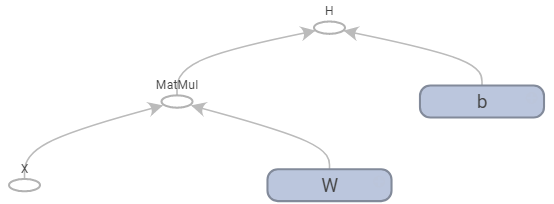
</div>

In [7]:
x_data = [[73, 80, 75],
          [93, 88, 93],
          [89, 91, 90],
          [96, 98, 100],
          [73, 66, 70]]
y_data = [[152],
          [185],
          [180],
          [196],
          [142]]

sess.run(tf.global_variables_initializer())

print(H.eval({X: x_data})) # print(sess.run(H, {X: x_data}))

[[ 228.]
 [ 274.]
 [ 270.]
 [ 294.]
 [ 209.]]


In [8]:
print(sess.run(cost, {X: x_data, Y: y_data}))

print(cost.eval({X: x_data, Y: y_data}))

7178.0
7178.0


In [9]:
sess.run(W.assign(tf.ones([3, 1]) * 2/3))

print(cost.eval({X: x_data, Y: y_data}))

2.5111


In [10]:
# https://www.tensorflow.org/api_docs/python/tf/random_normal
# tf.random_normal(
#     shape,
#     mean=0.0,
#     stddev=1.0,
#     dtype=tf.float32,
#     seed=None,
#     name=None
# )

print(tf.random_normal([2, 5]).eval())
print(tf.random_normal([2, 5], mean=10, stddev=10, seed=0).eval())
print(tf.reduce_mean(tf.random_normal([100, 100], mean=10, stddev=20, seed=0)).eval())

[[-0.17107289  1.48887289 -0.74259531 -1.96590328  0.45612082]
 [-0.14557733 -0.39804575 -0.17310977  1.38473117  0.4948518 ]]
[[  6.00842381  31.04439163  11.71072197  15.46518135 -14.23402786]
 [ 14.22554016  12.89437866   4.95695877   0.39310932   3.48901844]]
9.8742


In [11]:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed
# tf.set_random_seed(seed)

tf.set_random_seed(0)